# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [57]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yuzhno-kurilsk
Processing Record 2 of Set 1 | vadso
Processing Record 3 of Set 1 | opuwo
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | likasi
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | effium
Processing Record 8 of Set 1 | ciudad lazaro cardenas
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | saipan
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | novodvinsk
Processing Record 13 of Set 1 | hamilton
Processing Record 14 of Set 1 | axim
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | udachny
Processing Record 17 of Set 1 | upington
Processing Record 18 of Set 1 | waitangi
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | west island
Processing Record 22 of Set 1 | sao joao da barra
Processi

Processing Record 40 of Set 4 | park city
Processing Record 41 of Set 4 | keflavik
Processing Record 42 of Set 4 | tazovsky
Processing Record 43 of Set 4 | mirai
Processing Record 44 of Set 4 | guelmim
Processing Record 45 of Set 4 | kaihua
Processing Record 46 of Set 4 | vorkuta
Processing Record 47 of Set 4 | cockburn town
Processing Record 48 of Set 4 | codrington
Processing Record 49 of Set 4 | mount isa
Processing Record 0 of Set 5 | darab
Processing Record 1 of Set 5 | taksimo
Processing Record 2 of Set 5 | talnakh
Processing Record 3 of Set 5 | port lincoln
Processing Record 4 of Set 5 | aoulef
Processing Record 5 of Set 5 | kulia village
City not found. Skipping...
Processing Record 6 of Set 5 | bikin
Processing Record 7 of Set 5 | peniche
Processing Record 8 of Set 5 | alofi
Processing Record 9 of Set 5 | arteche
Processing Record 10 of Set 5 | usinsk
Processing Record 11 of Set 5 | punta arenas
Processing Record 12 of Set 5 | petropavlovsk-kamchatsky
Processing Record 13 of S

Processing Record 30 of Set 8 | tokar
Processing Record 31 of Set 8 | lengshuitan
Processing Record 32 of Set 8 | chegdomyn
Processing Record 33 of Set 8 | isangel
Processing Record 34 of Set 8 | laojunmiao
Processing Record 35 of Set 8 | urumqi
Processing Record 36 of Set 8 | tabou
Processing Record 37 of Set 8 | esperanza
Processing Record 38 of Set 8 | arno
Processing Record 39 of Set 8 | cairns city
City not found. Skipping...
Processing Record 40 of Set 8 | san antonio
Processing Record 41 of Set 8 | nabire
Processing Record 42 of Set 8 | kasane
Processing Record 43 of Set 8 | anzio
Processing Record 44 of Set 8 | oriximina
Processing Record 45 of Set 8 | pantai remis
Processing Record 46 of Set 8 | coahuayana de hidalgo
Processing Record 47 of Set 8 | jalpatagua
Processing Record 48 of Set 8 | tindouf
Processing Record 49 of Set 8 | gangakher
Processing Record 0 of Set 9 | thinadhoo
Processing Record 1 of Set 9 | copala
Processing Record 2 of Set 9 | kashgar
Processing Record 3 o

Processing Record 20 of Set 12 | nasiriyah
Processing Record 21 of Set 12 | monaghan
Processing Record 22 of Set 12 | ta'izz
Processing Record 23 of Set 12 | piti village
Processing Record 24 of Set 12 | xiaoweizhai
Processing Record 25 of Set 12 | chernyshevskiy
Processing Record 26 of Set 12 | shangzhi
Processing Record 27 of Set 12 | valparaiso
Processing Record 28 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 29 of Set 12 | mana
Processing Record 30 of Set 12 | kavaratti
Processing Record 31 of Set 12 | caxias
Processing Record 32 of Set 12 | kavalerovo
Processing Record 33 of Set 12 | danville
Processing Record 34 of Set 12 | langepas
-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yuzhno-kurilsk,44.0306,145.8556,275.58,80,25,2.98,RU,1699814974
1,vadso,70.0744,29.7487,269.24,80,0,6.17,NO,1699814974
2,opuwo,-18.0607,13.8400,300.33,32,97,5.93,NA,1699814974
3,adamstown,-25.0660,-130.1015,295.86,81,100,7.59,PN,1699814975
4,likasi,-10.9814,26.7333,291.47,94,100,1.79,CD,1699814975


In [24]:
# Export the City_Data into a csv
city_data_df.to_csv("../actual_output_data/cities.csv", index_label="City_ID")

In [25]:
# Read saved data
city_data_df = pd.read_csv("../actual_output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yuzhno-kurilsk,44.0306,145.8556,275.58,80,25,2.98,RU,1699814974
1,vadso,70.0744,29.7487,269.24,80,0,6.17,NO,1699814974
2,opuwo,-18.0607,13.8400,300.33,32,97,5.93,NaN,1699814974
3,adamstown,-25.0660,-130.1015,295.86,81,100,7.59,PN,1699814975
4,likasi,-10.9814,26.7333,291.47,94,100,1.79,CD,1699814975


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

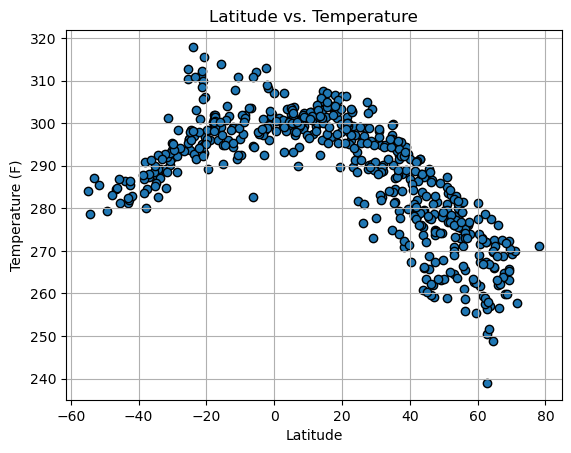

In [26]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)

# Save the figure
plt.savefig("../actual_output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

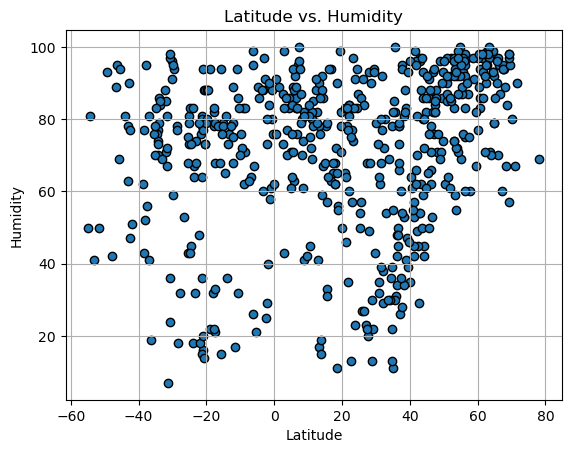

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Save the figure
plt.savefig("../actual_output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

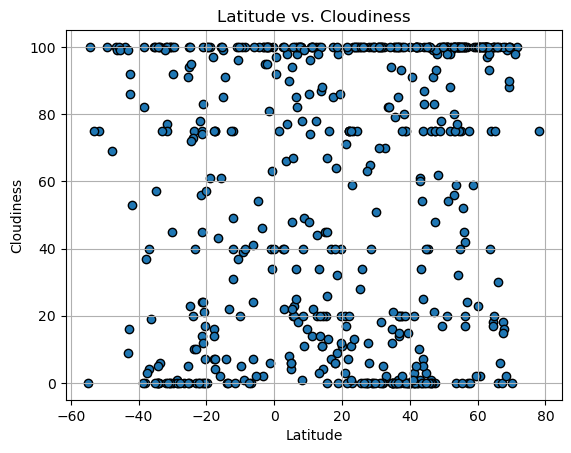

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("../actual_output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

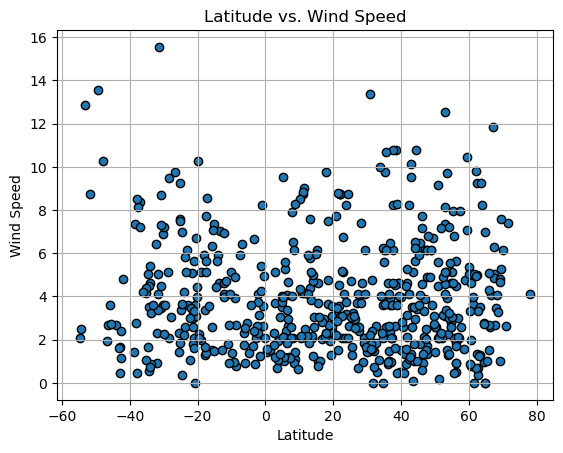

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("../actual_output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    
    plt.scatter(hemi_df['Lat'], hemi_df['Max Temp'], marker='o', label='Latitude')
    slope, intercept, r_value, p_value, std_err = linregress(hemi_df['Lat'], hemi_df['Max Temp'])
    regression_line = slope * southern_hemi_df['Lat'] + intercept
    plt.plot(hemi_df['Lat'], regression_line, color='red', label='Linear Regression')
    plt.xlabel('Latitude')
    plt.ylabel('Temperature (F)')
    plt.title('Southern Hemisphere: Temperature vs. Latitude Linear Regression')

    equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    r_value_text = f'R-value: {round(r_value, 2)}'
    plt.annotate(equation, (min(hemi_df['Lat']), min(hemi_df['Max Temp'])), fontsize=12, color='red')
    plt.annotate(r_value_text, (min(southern_hemi_df['Lat']), min(hemi_df['Max Temp']) + (max(hemi_df['Max Temp']) - min(hemi_df['Max Temp'])) * 0.9), fontsize=12, color='red')

    plt.legend()
    #plt.show()

In [42]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yuzhno-kurilsk,44.0306,145.8556,275.58,80,25,2.98,RU,1699814974
1,vadso,70.0744,29.7487,269.24,80,0,6.17,NO,1699814974
5,tiksi,71.6872,128.8694,257.66,90,100,7.38,RU,1699814975
6,effium,6.6292,8.0593,299.04,83,98,2.62,NG,1699814975
7,ciudad lazaro cardenas,17.9583,-102.2000,304.03,62,6,2.31,MX,1699814975


In [43]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,opuwo,-18.0607,13.8400,300.33,32,97,5.93,NaN,1699814974
3,adamstown,-25.0660,-130.1015,295.86,81,100,7.59,PN,1699814975
4,likasi,-10.9814,26.7333,291.47,94,100,1.79,CD,1699814975
8,puerto ayora,-0.7393,-90.3518,302.13,88,34,3.58,EC,1699814732
10,port-aux-francais,-49.3500,70.2167,279.40,93,100,13.54,TF,1699814976


###  Temperature vs. Latitude Linear Regression Plot

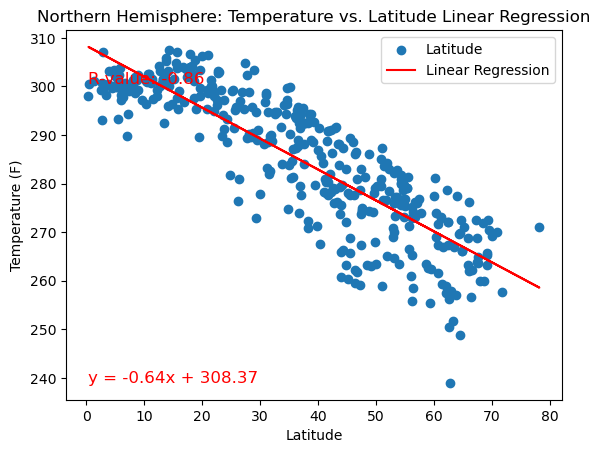

In [44]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], marker='o', label='Latitude')
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regression_line = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], regression_line, color='red', label='Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Northern Hemisphere: Temperature vs. Latitude Linear Regression')

equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_value_text = f'R-value: {round(r_value, 2)}'
plt.annotate(equation, (min(northern_hemi_df['Lat']), min(northern_hemi_df['Max Temp'])), fontsize=12, color='red')
plt.annotate(r_value_text, (min(northern_hemi_df['Lat']), min(northern_hemi_df['Max Temp']) + (max(northern_hemi_df['Max Temp']) - min(northern_hemi_df['Max Temp'])) * 0.9), fontsize=12, color='red')

plt.legend()
plt.show()

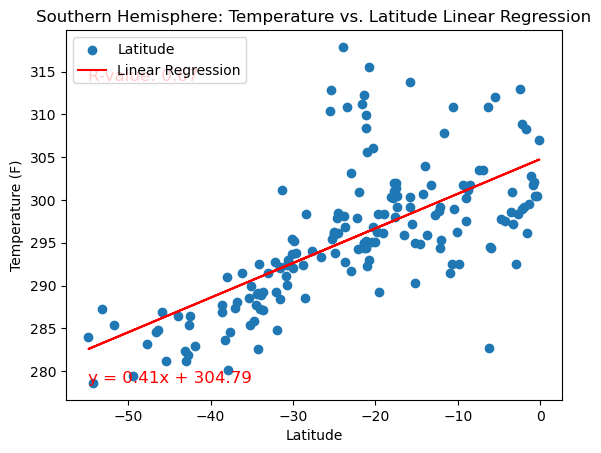

In [46]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], marker='o', label='Latitude')
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
regression_line = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], regression_line, color='red', label='Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Southern Hemisphere: Temperature vs. Latitude Linear Regression')

equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_value_text = f'R-value: {round(r_value, 2)}'
plt.annotate(equation, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Max Temp'])), fontsize=12, color='red')
plt.annotate(r_value_text, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Max Temp']) + (max(southern_hemi_df['Max Temp']) - min(southern_hemi_df['Max Temp'])) * 0.9), fontsize=12, color='red')

plt.legend()
plt.show()

**Discussion about the linear relationship:** Based on the above graphs, the closer to the equator you are the warmer the temperatures are going to be. 

### Humidity vs. Latitude Linear Regression Plot

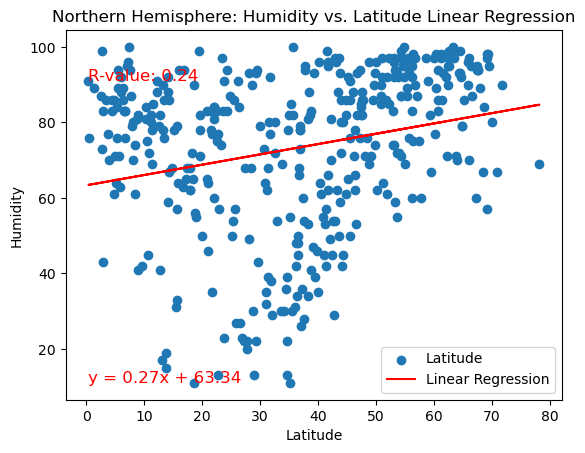

In [47]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], marker='o', label='Latitude')
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regression_line = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], regression_line, color='red', label='Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere: Humidity vs. Latitude Linear Regression')

equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_value_text = f'R-value: {round(r_value, 2)}'
plt.annotate(equation, (min(northern_hemi_df['Lat']), min(northern_hemi_df['Humidity'])), fontsize=12, color='red')
plt.annotate(r_value_text, (min(northern_hemi_df['Lat']), min(northern_hemi_df['Humidity']) + (max(northern_hemi_df['Humidity']) - min(northern_hemi_df['Humidity'])) * 0.9), fontsize=12, color='red')

plt.legend()
plt.show()

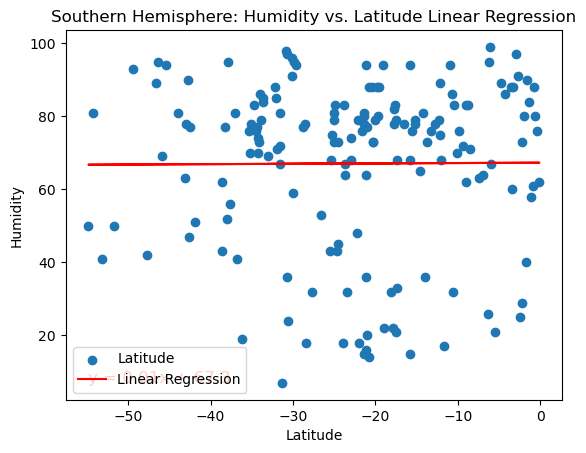

In [48]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], marker='o', label='Latitude')
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regression_line = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], regression_line, color='red', label='Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere: Humidity vs. Latitude Linear Regression')

equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_value_text = f'R-value: {round(r_value, 2)}'
plt.annotate(equation, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Humidity'])), fontsize=12, color='red')
plt.annotate(r_value_text, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Humidity']) + (max(southern_hemi_df['Humidity']) - min(southern_hemi_df['Max Temp'])) * 0.9), fontsize=12, color='red')

plt.legend()
plt.show()

**Discussion about the linear relationship:** While the humidity in the Southern hemisphere stays about the same on average no matter where you are in relation to the equator, the Northern hemisphere is less humid on average closer to the equator and more humid the further away you get.

### Cloudiness vs. Latitude Linear Regression Plot

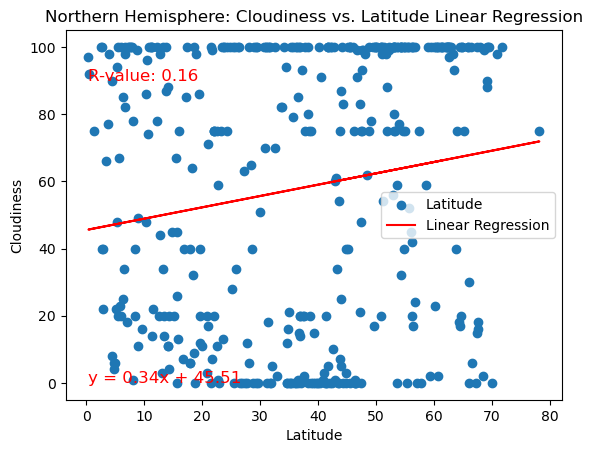

In [49]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], marker='o', label='Latitude')
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regression_line = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], regression_line, color='red', label='Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Cloudiness vs. Latitude Linear Regression')

equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_value_text = f'R-value: {round(r_value, 2)}'
plt.annotate(equation, (min(northern_hemi_df['Lat']), min(northern_hemi_df['Cloudiness'])), fontsize=12, color='red')
plt.annotate(r_value_text, (min(northern_hemi_df['Lat']), min(northern_hemi_df['Cloudiness']) + (max(northern_hemi_df['Cloudiness']) - min(northern_hemi_df['Cloudiness'])) * 0.9), fontsize=12, color='red')

plt.legend()
plt.show()

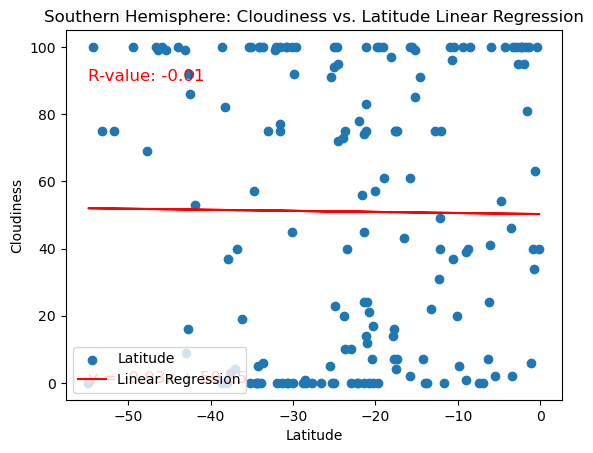

In [50]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], marker='o', label='Latitude')
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regression_line = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], regression_line, color='red', label='Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Cloudiness vs. Latitude Linear Regression')

equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_value_text = f'R-value: {round(r_value, 2)}'
plt.annotate(equation, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Cloudiness'])), fontsize=12, color='red')
plt.annotate(r_value_text, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Cloudiness']) + (max(southern_hemi_df['Cloudiness']) - min(southern_hemi_df['Cloudiness'])) * 0.9), fontsize=12, color='red')

plt.legend()
plt.show()

**Discussion about the linear relationship:** There is a higher chance of cloudiness in the northern hemisphere than in the southern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

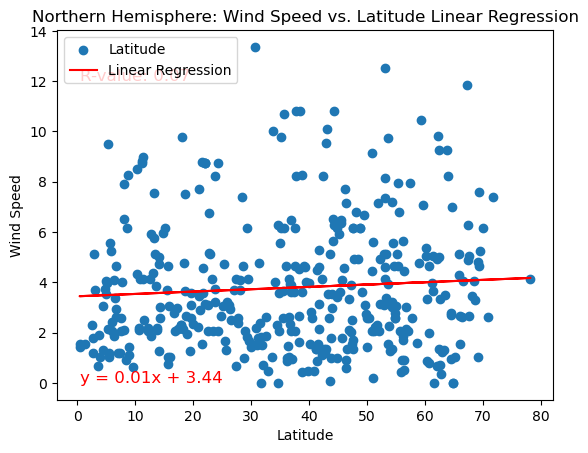

In [51]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], marker='o', label='Latitude')
slope, intercept, r_value, p_value, std_err = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regression_line = slope * northern_hemi_df['Lat'] + intercept
plt.plot(northern_hemi_df['Lat'], regression_line, color='red', label='Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Wind Speed vs. Latitude Linear Regression')

equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_value_text = f'R-value: {round(r_value, 2)}'
plt.annotate(equation, (min(northern_hemi_df['Lat']), min(northern_hemi_df['Wind Speed'])), fontsize=12, color='red')
plt.annotate(r_value_text, (min(northern_hemi_df['Lat']), min(northern_hemi_df['Wind Speed']) + (max(northern_hemi_df['Wind Speed']) - min(northern_hemi_df['Wind Speed'])) * 0.9), fontsize=12, color='red')

plt.legend()
plt.show()

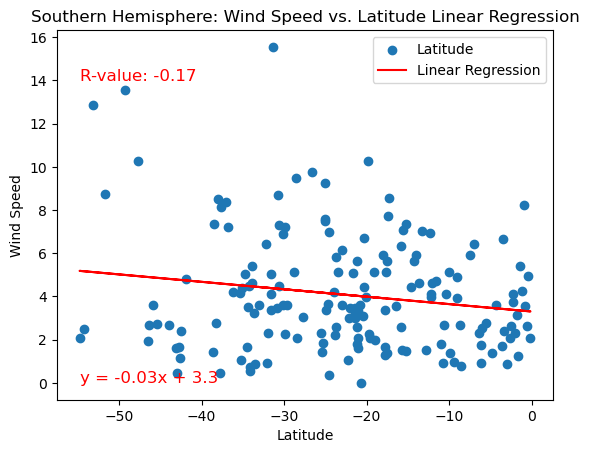

In [52]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], marker='o', label='Latitude')
slope, intercept, r_value, p_value, std_err = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regression_line = slope * southern_hemi_df['Lat'] + intercept
plt.plot(southern_hemi_df['Lat'], regression_line, color='red', label='Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Wind Speed vs. Latitude Linear Regression')

equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
r_value_text = f'R-value: {round(r_value, 2)}'
plt.annotate(equation, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Wind Speed'])), fontsize=12, color='red')
plt.annotate(r_value_text, (min(southern_hemi_df['Lat']), min(southern_hemi_df['Wind Speed']) + (max(southern_hemi_df['Wind Speed']) - min(southern_hemi_df['Wind Speed'])) * 0.9), fontsize=12, color='red')

plt.legend()
plt.show()

**Discussion about the linear relationship:** While wind speed is relatively the same in the northern hemisphere, in the southern hemisphere the further away from the equator you get the windier it could get. 